In [1]:
import pandas as pd

# 1 - parser ON

In [10]:
# Submit the SLURM job for mzml_parser_1.sh
!sbatch core/backend/mzml_parser_1_AMP.sh


Submitted batch job 19951693


In [10]:
# sum = pd.read_parquet('Projects/STD/mzml_parsed/ON/sum/df_transition_summed_1_test.parquet')
# sum

In [11]:
df = pd.read_parquet('Projects/AMP/mzml_parsed/ON/df_mzml_parser_1_AMP.parquet')
df

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,None,227.1,183.0,0.011583,41.060001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0
1,None,227.1,183.0,0.024483,41.360004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0
2,None,227.1,183.0,0.037383,41.320004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0
3,None,227.1,183.0,0.050317,41.340004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0
4,None,227.1,183.0,0.063233,41.380001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0
...,...,...,...,...,...,...,...
478135,None,533.5,183.0,29.949033,41.220001,11162023_WT-m1-hippo-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0
478136,None,533.5,183.0,29.961950,41.220001,11162023_WT-m1-hippo-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0
478137,None,533.5,183.0,29.974867,41.280003,11162023_WT-m1-hippo-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0
478138,None,533.5,183.0,29.987783,41.060001,11162023_WT-m1-hippo-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0


In [6]:
# Ensure the Parent_Ion column is numeric
df['Parent_Ion'] = pd.to_numeric(df['Parent_Ion'], errors='coerce')

# Set tolerance for Parent_Ion comparison
tolerance = 0.2

# Filter based on Parent_Ion and Retention_Time window
df_filtered = df[(df['Parent_Ion'] >= 423.4 - tolerance) & 
                 (df['Parent_Ion'] <= 423.4 + tolerance) &
                 (df['Retention_Time'] >= 5) &
                 (df['Retention_Time'] <= 15)]

# Sort the filtered DataFrame by Retention_Time
df_filtered_sorted = df_filtered.sort_values(by='Retention_Time', ascending=True)

# Display the sorted DataFrame
df_filtered_sorted


,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
418154,None,423.3,183.0,5.005817,125.960007,11162023_WT-m1-hippo-FAD245_AMP_2x_0.05uMd216-...,423.3 -> 183.0
178181,None,423.3,183.0,5.005817,61.040005,11162023_WT-m1-cortex-FAD245_AMP_2x_0.05uMd216...,423.3 -> 183.0
290443,None,423.3,183.0,5.005833,48.600002,11162023_WT-m1-dienc-FAD245_AMP_2x_0.05uMd216-...,423.3 -> 183.0
67725,None,423.3,183.0,5.005833,41.480003,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,423.3 -> 183.0
178182,None,423.3,183.0,5.018733,84.000008,11162023_WT-m1-cortex-FAD245_AMP_2x_0.05uMd216...,423.3 -> 183.0
...,...,...,...,...,...,...,...
68497,None,423.3,183.0,14.980350,391.220032,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,423.3 -> 183.0
418927,None,423.3,183.0,14.993233,516.500061,11162023_WT-m1-hippo-FAD245_AMP_2x_0.05uMd216-...,423.3 -> 183.0
178954,None,423.3,183.0,14.993250,352.200012,11162023_WT-m1-cortex-FAD245_AMP_2x_0.05uMd216...,423.3 -> 183.0
68498,None,423.3,183.0,14.993267,357.100037,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,423.3 -> 183.0


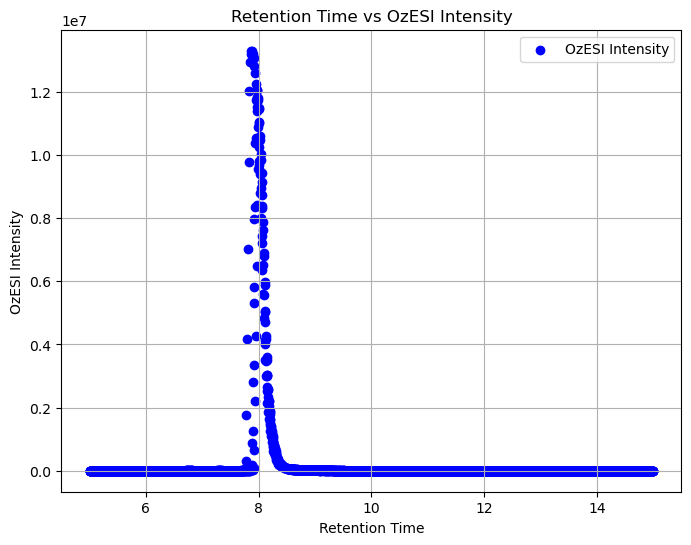

In [7]:
import matplotlib.pyplot as plt

# Plot the filtered data
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered_sorted['Retention_Time'], df_filtered_sorted['OzESI_Intensity'], color='blue', label='OzESI Intensity')

# Add labels and title
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# 2 - Sample

In [12]:
# Submit the SLURM job for !sbatch core/backend/sample_2.sh
!sbatch core/backend/sample_2_AMP.sh


Submitted batch job 19951710


In [13]:
import pandas as pdt
df = pd.read_parquet('Projects/AMP/samples/ON/df_sample_2_cereb_WT_m1_FAD245_ON.parquet')
df

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,STD,STD_RT_ON
0,None,227.1,183.0,0.011583,41.060001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233
1,None,227.1,183.0,0.024483,41.360004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233
2,None,227.1,183.0,0.037383,41.320004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233
3,None,227.1,183.0,0.050317,41.340004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233
4,None,227.1,183.0,0.063233,41.380001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233
...,...,...,...,...,...,...,...,...,...,...
127706,None,533.5,183.0,29.949050,41.680004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,None,7.990233
127707,None,533.5,183.0,29.961967,41.660004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,None,7.990233
127708,None,533.5,183.0,29.974883,41.740002,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,None,7.990233
127709,None,533.5,183.0,29.987800,41.540005,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,None,7.990233


# 3 - Match

In [16]:
# Submit the SLURM job for !sbatch core/backend/match_3.sh
!sbatch core/backend/match_3_AMP.sh


Submitted batch job 19952977


In [17]:
import pandas as pd
df = pd.read_parquet('Projects/AMP/match/ON/df_match_3_cereb_WT_m1_FAD245.parquet')
#print unqiue vlaues of Lipid in df
# print(df['Isomer'].unique())

df

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,STD,STD_RT_ON,STD_RT_Dif,Species,Adjusted_RT,Class,STD_RT_OFF
0,,227.1,183.0,2.996150,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,0.025833,10:1,3.485117,,8.016067
1,,227.1,183.0,3.009083,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,0.025833,10:1,3.485117,,8.016067
2,,227.1,183.0,3.022000,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,0.025833,10:1,3.485117,,8.016067
3,,227.1,183.0,3.034917,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,0.025833,10:1,3.485117,,8.016067
4,,227.1,183.0,3.047833,42.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,0.025833,10:1,3.485117,,8.016067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144677,,533.5,183.0,4.172933,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,0.025833,9:1,3.731000,,8.016067
144678,,533.5,183.0,4.185850,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,0.025833,9:1,3.731000,,8.016067
144679,,533.5,183.0,4.198767,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,0.025833,9:1,3.731000,,8.016067
144680,,533.5,183.0,4.211700,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,0.025833,9:1,3.731000,,8.016067


In [5]:
# # Ensure the Parent_Ion column is numeric
# df['Parent_Ion'] = pd.to_numeric(df['Parent_Ion'], errors='coerce')

# # Set tolerance for Parent_Ion comparison
# tolerance = 0.2

# # Filter based on Parent_Ion and Retention_Time window
# df_filtered = df[(df['Parent_Ion'] >= 423.4 - tolerance) & 
#                  (df['Parent_Ion'] <= 423.4 + tolerance) &
#                  (df['Retention_Time'] >= 14) &
#                  (df['Retention_Time'] <= 15) ]

# # Sort the filtered DataFrame by Retention_Time
# df_filtered_sorted = df_filtered.sort_values(by='Retention_Time', ascending=True)

# # Print each Lipid value on a new line
# for lipid in df_filtered_sorted['Lipid']:
#     print(lipid)


# # Display the sorted DataFrame
# df_filtered_sorted


In [21]:
df[df['Lipid'].str.contains('24:1', case=False, na=False)]

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,STD,STD_RT_ON,STD_RT_Dif,Species,Adjusted_RT,Class,STD_RT_OFF


In [8]:
# ozon_database = pd.read_parquet('lipid_database/OzON_databases/OzON_Possible_Database_0.parquet')
# ozon_database

# # Filter the OzON database for rows where Parent_Ion is 423.4
# filtered_data = ozon_database[ozon_database['Parent_Ion'] == 423.4]

# filtered_data


# 4 - group

In [22]:
!sbatch core/backend/group_4_AMP.sh

Submitted batch job 19954358


In [23]:
import pandas as pd
df = pd.read_parquet('Projects/AMP/group/ON/df_group_4_cereb_WT_m1_FAD245.parquet')
#print unqiue vlaues of Lipid in df
# print(df['Isomer'].unique())
df

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,STD,STD_RT_ON,...,Adjusted_RT,Class,STD_RT_OFF,Possible_Lipids,Biology,Genotype,Cage,Mouse,group_by_ion,group_by_lipid
0,FA(10:1)_<>_n-2,325.2,183.0,2.994350,720.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,3.485117,FA,8.016067,FA(10:1)_<>_n-2 | FA(12:1)_<>_n-4 | FA(13:1)_<...,cereb,WT,FAD245,m1,8,0
1,FA(10:1)_<>_n-2,325.2,183.0,3.007267,908.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,3.485117,FA,8.016067,FA(10:1)_<>_n-2 | FA(12:1)_<>_n-4 | FA(13:1)_<...,cereb,WT,FAD245,m1,8,0
2,FA(10:1)_<>_n-2,325.2,183.0,3.020183,1075.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,3.485117,FA,8.016067,FA(10:1)_<>_n-2 | FA(12:1)_<>_n-4 | FA(13:1)_<...,cereb,WT,FAD245,m1,8,0
3,FA(10:1)_<>_n-2,325.2,183.0,3.033100,1358.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,3.485117,FA,8.016067,FA(10:1)_<>_n-2 | FA(12:1)_<>_n-4 | FA(13:1)_<...,cereb,WT,FAD245,m1,8,0
4,FA(10:1)_<>_n-2,325.2,183.0,3.046017,1499.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,3.485117,FA,8.016067,FA(10:1)_<>_n-2 | FA(12:1)_<>_n-4 | FA(13:1)_<...,cereb,WT,FAD245,m1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47579,FA(9:1)_<>_n-7,241.1,183.0,4.171700,146.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,241.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,3.731000,FA,8.016067,FA(8:1)_<>_n-6 | FA(9:1)_<>_n-7 | FA(10:1)_<>_...,cereb,WT,FAD245,m1,0,353
47580,FA(9:1)_<>_n-7,241.1,183.0,4.184617,98.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,241.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,3.731000,FA,8.016067,FA(8:1)_<>_n-6 | FA(9:1)_<>_n-7 | FA(10:1)_<>_...,cereb,WT,FAD245,m1,0,353
47581,FA(9:1)_<>_n-7,241.1,183.0,4.197550,42.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,241.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,3.731000,FA,8.016067,FA(8:1)_<>_n-6 | FA(9:1)_<>_n-7 | FA(10:1)_<>_...,cereb,WT,FAD245,m1,0,353
47582,FA(9:1)_<>_n-7,241.1,183.0,4.210467,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,241.1 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,3.731000,FA,8.016067,FA(8:1)_<>_n-6 | FA(9:1)_<>_n-7 | FA(10:1)_<>_...,cereb,WT,FAD245,m1,0,353


In [24]:
df[df['Lipid'].str.contains('18:1', case=False, na=False)]

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,STD,STD_RT_ON,...,Adjusted_RT,Class,STD_RT_OFF,Possible_Lipids,Biology,Genotype,Cage,Mouse,group_by_ion,group_by_lipid
14683,FA(18:1)_<>_n-10,325.2,183.0,8.214167,157.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,8.712317,FA,8.016067,FA(10:1)_<>_n-2 | FA(12:1)_<>_n-4 | FA(13:1)_<...,cereb,WT,FAD245,m1,8,114
14684,FA(18:1)_<>_n-10,325.2,183.0,8.227083,151.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,8.712317,FA,8.016067,FA(10:1)_<>_n-2 | FA(12:1)_<>_n-4 | FA(13:1)_<...,cereb,WT,FAD245,m1,8,114
14685,FA(18:1)_<>_n-10,325.2,183.0,8.240017,132.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,8.712317,FA,8.016067,FA(10:1)_<>_n-2 | FA(12:1)_<>_n-4 | FA(13:1)_<...,cereb,WT,FAD245,m1,8,114
14686,FA(18:1)_<>_n-10,325.2,183.0,8.252933,74.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,8.712317,FA,8.016067,FA(10:1)_<>_n-2 | FA(12:1)_<>_n-4 | FA(13:1)_<...,cereb,WT,FAD245,m1,8,114
14687,FA(18:1)_<>_n-10,325.2,183.0,8.265850,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,8.712317,FA,8.016067,FA(10:1)_<>_n-2 | FA(12:1)_<>_n-4 | FA(13:1)_<...,cereb,WT,FAD245,m1,8,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17008,FA(18:1)_<>_n-9,339.3,183.0,9.467033,42.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,9.022417,FA,8.016067,FA(12:1)_<>_n-3 | FA(13:1)_<>_n-4 | FA(14:1)_<...,cereb,WT,FAD245,m1,10,128
17009,FA(18:1)_<>_n-9,339.3,183.0,9.479950,42.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,9.022417,FA,8.016067,FA(12:1)_<>_n-3 | FA(13:1)_<>_n-4 | FA(14:1)_<...,cereb,WT,FAD245,m1,10,128
17010,FA(18:1)_<>_n-9,339.3,183.0,9.492883,42.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,9.022417,FA,8.016067,FA(12:1)_<>_n-3 | FA(13:1)_<>_n-4 | FA(14:1)_<...,cereb,WT,FAD245,m1,10,128
17011,FA(18:1)_<>_n-9,339.3,183.0,9.505800,42.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,None,7.990233,...,9.022417,FA,8.016067,FA(12:1)_<>_n-3 | FA(13:1)_<>_n-4 | FA(14:1)_<...,cereb,WT,FAD245,m1,10,128


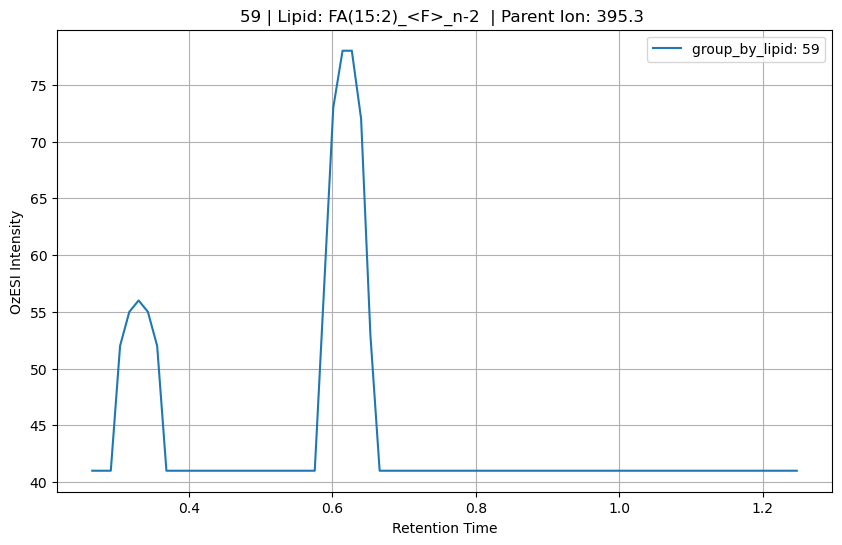

In [25]:
import matplotlib.pyplot as plt

# Function to plot the chromatogram for a specific group_by_lipid value
def plot_chromatogram(df, group_value):
    group_data = df[df['group_by_lipid'] == group_value]
    
    # Ensure the Retention_Time is sorted
    group_data = group_data.sort_values(by='Retention_Time')
    
    # Extract Lipid, Parent Ion, and Isomer values from the first row of the group
    lipid = group_data['Lipid'].iloc[0] if not group_data.empty else "Unknown Lipid"
    parent_ion = group_data['Parent_Ion'].iloc[0] if not group_data.empty else "Unknown Parent Ion"
    # isomer = group_data['Isomer'].iloc[0] if not group_data.empty else "Unknown Isomer"
    
    plt.figure(figsize=(10, 6))
    plt.plot(group_data['Retention_Time'], group_data['OzESI_Intensity'], label=f'group_by_lipid: {group_value}')
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    
    # Add Lipid, Parent Ion, and Isomer to the title
    plt.title(f'{group_value} | Lipid: {lipid} | Parent Ion: {parent_ion} ')
    
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the specific group_by_lipid value you are interested in
specific_group_by_lipid_value = 59  # Replace with the actual value you are interested in

# Call the function to plot the chromatogram
plot_chromatogram(df, specific_group_by_lipid_value)


# 5 - Analysis

In [26]:
!sbatch core/backend/analysis_5_AMP.sh

Submitted batch job 19954393


In [30]:
import pandas as pd
df_analysis = pd.read_parquet('Projects/AMP/analysis/ON/df_analysis_5_cereb_WT_m1_FAD245.parquet')
#print number of unqiue values
# print(df_analysis['Isomer'].unique())
#print unique lipid values for Lipid FA(20:1)
# df_analysis
# df_analysis[df_analysis['Lipid'].str.contains('24:1', case=False, na=False)]
# df_analysis.to_csv('Projects/STD/analysis/ON/df_analysis_5_FAME.csv', index=False)
df_analysis



,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,Peak_Area,Filter_Column,STD_RT_ON,STD_RT_OFF,STD_RT_Dif,Biology,Genotype,Cage,Mouse,n_value
0,FA(10:1)_<>_n-2,3.046017,1499.0,8,0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,325.2,183.0,...,58.111233,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2
1,FA(10:1)_<>_n-2,3.640367,3071.0,8,0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,325.2,183.0,...,277.720767,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2
2,FA(10:1)_<>_n-2,3.834167,416809.0,8,0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,325.2,183.0,...,21542.078483,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2
3,FA(10:1)_<>_n-3,3.421117,1348.0,6,1,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,69.669133,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,3
4,FA(10:1)_<>_n-3,3.602000,50798.0,6,1,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,3281.550800,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,FA(22:6)_<FFFFF>_n-19,0.670100,2165.0,1,338,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,255.2 -> 183.0,cereb_WT_m1_FAD245,255.2,183.0,...,139.859000,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,19
243,FA(8:1)_<>_n-2,3.344000,10529.0,4,343,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,297.2 -> 183.0,cereb_WT_m1_FAD245,297.2,183.0,...,680.348883,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2
244,FA(9:1)_<>_n-2,3.421117,1348.0,6,348,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,69.669133,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2
245,FA(9:1)_<>_n-2,3.602000,50798.0,6,348,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,3281.550800,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2


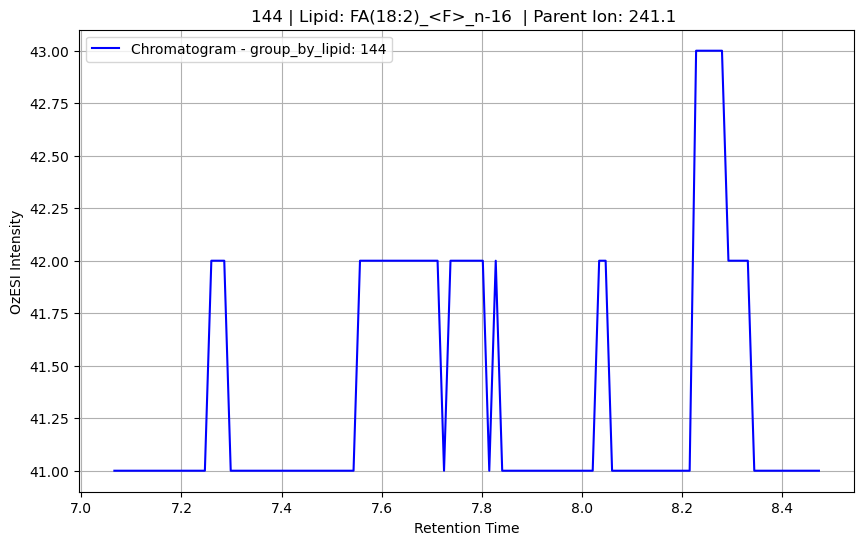

In [31]:
import matplotlib.pyplot as plt

# Function to plot the chromatogram for a specific group_by_lipid value, including analysis data (peaks)
def plot_chromatogram(df_grouped, df_analysis, group_value):
    """
    Plot the chromatogram for a specific group_by_lipid value.

    :param df_grouped: DataFrame containing the original grouped data.
    :param df_analysis: DataFrame containing the analyzed data (peaks).
    :param group_value: The specific group_by_lipid value to plot.
    """
    # Filter data for the specific group_by_lipid value
    group_data = df_grouped[df_grouped['group_by_lipid'] == group_value]
    analysis_data = df_analysis[df_analysis['group_by_lipid'] == group_value]
    
    # Ensure the Retention_Time is sorted in both DataFrames
    group_data = group_data.sort_values(by='Retention_Time')
    analysis_data = analysis_data.sort_values(by='Retention_Time')

    # Extract Lipid, Parent Ion, and Isomer values from the first row of the group
    lipid = group_data['Lipid'].iloc[0] if not group_data.empty else "Unknown Lipid"
    parent_ion = group_data['Parent_Ion'].iloc[0] if not group_data.empty else "Unknown Parent Ion"
    # isomer = group_data['Isomer'].iloc[0] if not group_data.empty else "Unknown Isomer"
    
    # Plot the grouped data (original chromatogram)
    plt.figure(figsize=(10, 6))
    plt.plot(group_data['Retention_Time'], group_data['OzESI_Intensity'], label=f'Chromatogram - group_by_lipid: {group_value}', color='blue')
    
    # Overlay the analysis data (peaks)
    if not analysis_data.empty:
        plt.scatter(analysis_data['Retention_Time'], analysis_data['OzESI_Intensity'], color='red', marker='x', label='Identified Peaks')

    # Add labels and title
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    
    # Add Lipid, Parent Ion, and Isomer to the title
    plt.title(f'{group_value} | Lipid: {lipid} | Parent Ion: {parent_ion} ')
    
    # Add a legend and grid
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Example: Define the specific group_by_lipid value you are interested in
specific_group_by_lipid_value = 144  # Replace with the actual value you are interested in

# Call the function to plot the chromatogram and analysis data
plot_chromatogram(df, df_analysis, specific_group_by_lipid_value)


# FILTER BASED ON RT AGAIN OzOFF vs OzON

In [26]:
# import pandas as pd

# def filter_ozON_by_ozOFF(df_analysis, off_possible, retention_time_tolerance=0.3):
#     """
#     Filters df_analysis (OzON data) based on Retention_Time and Species from off_possible (OzOFF data)
#     with a user-defined tolerance for retention times.

#     Parameters:
#     df_analysis (pd.DataFrame): DataFrame containing OzON results.
#     off_possible (pd.DataFrame): DataFrame containing OzOFF possible matches.
#     retention_time_tolerance (float): The tolerance for filtering retention times (default: 0.3).

#     Returns:
#     pd.DataFrame: Filtered df_analysis DataFrame (OzON) based on OzOFF retention time and species.
#     """
#     # Initialize an empty DataFrame to store the filtered results
#     filtered_df = pd.DataFrame()

#     # Iterate over each row in the off_possible (OzOFF data)
#     for _, row in off_possible.iterrows():
#         species = row['Species']
#         retention_time_off = row['Retention_Time']

#         # Define the retention time window based on the tolerance
#         retention_time_start = retention_time_off - retention_time_tolerance
#         retention_time_end = retention_time_off + retention_time_tolerance

#         # Filter df_analysis (OzON data) based on the species and the retention time window
#         filtered_rows = df_analysis[
#             (df_analysis['Species'] == species) &
#             (df_analysis['Retention_Time'] >= retention_time_start) &
#             (df_analysis['Retention_Time'] <= retention_time_end)
#         ]

#         # Concatenate the filtered results to the overall filtered_df
#         filtered_df = pd.concat([filtered_df, filtered_rows], ignore_index=True)

#     # Return the filtered df_analysis DataFrame (OzON data)
#     return filtered_df

# # Example usage:
# # df_analysis = pd.read_parquet('Projects/STD/analysis/ON/df_analysis_5_FAME.parquet')
# # off_possible = pd.read_parquet('Projects/STD/analysis/OFF/df_analysis_5_FAME_OFF_max.parquet')
# df_analysis = pd.read_parquet('Projects/STD/analysis/ON/df_analysis_5_FAME.parquet')
# off_possible = pd.read_parquet('Projects/STD/analysis/OFF/df_analysis_5_FAME_OFF_twoisomers.parquet')

# # Set the retention time tolerance (user can modify this)
# retention_time_tolerance = 0.05
# # Call the function to filter the OzON data based on OzOFF criteria
# filtered_ozON = filter_ozON_by_ozOFF(df_analysis, off_possible, retention_time_tolerance)

# filtered_ozON


In [53]:
# import pandas as pd

# def filter_ozON_by_ozOFF(df_analysis, off_possible, retention_time_tolerance=0.3):
#     """
#     Filters df_analysis (OzON data) based on Retention_Time and Species from off_possible (OzOFF data)
#     with a user-defined tolerance for retention times, adjusting the OzON Retention_Time by STD_RT_Dif if it exists.
#     Also, adds an Isomer column based on the same Lipid value with different Retention_Time values.

#     Parameters:
#     df_analysis (pd.DataFrame): DataFrame containing OzON results.
#     off_possible (pd.DataFrame): DataFrame containing OzOFF possible matches.
#     retention_time_tolerance (float): The tolerance for filtering retention times (default: 0.3).

#     Returns:
#     pd.DataFrame: Filtered df_analysis DataFrame (OzON) based on OzOFF retention time and species, with Isomer column added.
#     """
#     # Create a new column Adjusted_RT based on Retention_Time and STD_RT_Dif
#     if 'STD_RT_Dif' in df_analysis.columns:
#         df_analysis['Adjusted_RT'] = df_analysis['Retention_Time'] + df_analysis['STD_RT_Dif']
#     else:
#         df_analysis['Adjusted_RT'] = df_analysis['Retention_Time']

#     # Initialize an empty DataFrame to store the filtered results
#     filtered_df = pd.DataFrame()

#     # Iterate over each row in the off_possible (OzOFF data)
#     for _, row in off_possible.iterrows():
#         species = row['Species']
#         retention_time_off = row['Retention_Time']

#         # Define the retention time window based on the tolerance
#         retention_time_start = retention_time_off - retention_time_tolerance
#         retention_time_end = retention_time_off + retention_time_tolerance

#         # Filter df_analysis (OzON data) based on the species and the adjusted retention time window
#         filtered_rows = df_analysis[
#             (df_analysis['Species'] == species) &
#             (df_analysis['Adjusted_RT'] >= retention_time_start) &
#             (df_analysis['Adjusted_RT'] <= retention_time_end)
#         ]

#         # Concatenate the filtered results to the overall filtered_df
#         filtered_df = pd.concat([filtered_df, filtered_rows], ignore_index=True)

#     # # Now that we have filtered the data, we will add the Isomer column based on the Retention_Time order for each Lipid
#     # filtered_df['Isomer'] = filtered_df.groupby('Lipid')['Retention_Time'].rank(method='dense').astype(int)

#     # # Return the filtered df_analysis DataFrame (OzON data) with the Isomer column added
#     return filtered_df

# # Example usage:
# # df_analysis = pd.read_parquet('Projects/STD/analysis/ON/df_analysis_5_FAME.parquet')
# # off_possible = pd.read_parquet('Projects/STD/analysis/OFF/df_analysis_5_FAME_OFF_max.parquet')
# df_analysis = pd.read_parquet('Projects/AMP/analysis/ON/df_analysis_5_cereb_WT_m1_FAD245.parquet')
# off_possible = pd.read_parquet('Projects/AMP/analysis/OFF/off_possible/df_analysis_5_cereb_WT_m1_FAD245_OFF_offpossible.parquet')

# # Set the retention time tolerance (user can modify this)
# retention_time_tolerance = 0.1

# # Call the function to filter the OzON data based on OzOFF criteria and adjust by STD_RT_Dif
# filtered_ozON = filter_ozON_by_ozOFF(df_analysis, off_possible, retention_time_tolerance)

# # filtered_ozON.to_csv('Projects/STD/analysis/ON/df_analysis_5_FAME_filtered_RT_twice.csv', index=False)

# # Display the filtered data with Isomer column
# filtered_ozON


,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,Filter_Column,STD_RT_ON,STD_RT_OFF,STD_RT_Dif,Biology,Genotype,Cage,Mouse,n_value,Adjusted_RT
0,FA(10:1)_<>_n-3,3.421117,1348.0,6,1,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,3,3.446950
1,FA(10:1)_<>_n-4,3.344000,10529.0,4,2,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,297.2 -> 183.0,cereb_WT_m1_FAD245,297.2,183.0,...,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,4,3.369833
2,FA(12:1)_<>_n-2,3.251933,3531.0,12,8,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,353.3 -> 183.0,cereb_WT_m1_FAD245,353.3,183.0,...,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2,3.277767
3,FA(12:1)_<>_n-3,3.329867,10007.0,10,9,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,339.3,183.0,...,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,3,3.355700
4,FA(12:1)_<>_n-6,3.344000,10529.0,4,12,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,297.2 -> 183.0,cereb_WT_m1_FAD245,297.2,183.0,...,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,6,3.369833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,FA(22:6)_<FFFFF>_n-17,0.643850,5675.0,3,336,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,283.2 -> 183.0,cereb_WT_m1_FAD245,283.2,183.0,...,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,17,0.669683
80,FA(22:6)_<FFFFF>_n-19,0.670100,2165.0,1,338,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,255.2 -> 183.0,cereb_WT_m1_FAD245,255.2,183.0,...,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,19,0.695933
81,FA(22:6)_<FFFFF>_n-8,6.285567,1352.0,25,341,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,409.3 -> 183.0,cereb_WT_m1_FAD245,409.3,183.0,...,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,8,6.311400
82,FA(22:6)_<FFFFF>_n-9,6.273467,1583222.0,21,342,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,group_by_lipid,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,9,6.299300


In [23]:
import pandas as pd
def filter_ozON_by_ozOFF(df_analysis, off_possible, retention_time_tolerance=0.3):
    """
    Filters df_analysis (OzON data) based on Retention_Time, Species, and Isomer from off_possible (OzOFF data)
    with a user-defined tolerance for retention times, adjusting the OzON Retention_Time by STD_RT_Dif if it exists.
    Adds an Isomer column based on the same Lipid value with different Retention_Time values.

    Parameters:
    df_analysis (pd.DataFrame): DataFrame containing OzON results.
    off_possible (pd.DataFrame): DataFrame containing OzOFF possible matches.
    retention_time_tolerance (float): The tolerance for filtering retention times (default: 0.3).

    Returns:
    pd.DataFrame: Filtered df_analysis DataFrame (OzON) based on OzOFF retention time, species, and isomer, with Isomer column added.
    """
    # Create a new column Adjusted_RT based on Retention_Time and STD_RT_Dif
    if 'STD_RT_Dif' in df_analysis.columns:
        df_analysis['Adjusted_RT'] = df_analysis['Retention_Time'] + df_analysis['STD_RT_Dif']
    else:
        df_analysis['Adjusted_RT'] = df_analysis['Retention_Time']

    # Create the Isomer column in df_analysis if it does not exist
    if 'Isomer' not in df_analysis.columns:
        df_analysis['Isomer'] = df_analysis.groupby('Lipid')['Retention_Time'].rank(method='dense').astype(int)

    # Initialize an empty DataFrame to store the filtered results
    filtered_df = pd.DataFrame()

    # Iterate over each row in the off_possible (OzOFF data)
    for _, row in off_possible.iterrows():
        species = row['Species']
        isomer = row['Isomer']
        retention_time_off = row['Retention_Time']

        # Define the retention time window based on the tolerance
        retention_time_start = retention_time_off - retention_time_tolerance
        retention_time_end = retention_time_off + retention_time_tolerance

        # Filter df_analysis (OzON data) based on the species, isomer, and the adjusted retention time window
        filtered_rows = df_analysis[
            (df_analysis['Species'] == species) &
            (df_analysis['Isomer'] == isomer) &
            (df_analysis['Adjusted_RT'] >= retention_time_start) &
            (df_analysis['Adjusted_RT'] <= retention_time_end)
        ]

        # Concatenate the filtered results to the overall filtered_df
        filtered_df = pd.concat([filtered_df, filtered_rows], ignore_index=True)

    return filtered_df

# Example usage:
# Load the DataFrames
df_analysis = pd.read_parquet('Projects/AMP/analysis/ON/df_analysis_5_cereb_WT_m1_FAD245.parquet')
off_possible = pd.read_parquet('Projects/AMP/analysis/OFF/off_possible/df_analysis_5_cereb_WT_m1_FAD245_OFF_offpossible.parquet')

# Set the retention time tolerance (user can modify this)
retention_time_tolerance = 0.05

# Call the function to filter the OzON data based on OzOFF criteria and adjust by STD_RT_Dif
filtered_ozON = filter_ozON_by_ozOFF(df_analysis, off_possible, retention_time_tolerance)

# Save or display the filtered data
# filtered_ozON.to_csv('filtered_ozON.csv', index=False)

# Display the filtered data with Isomer column
filtered_ozON


,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,STD_RT_ON,STD_RT_OFF,STD_RT_Dif,Biology,Genotype,Cage,Mouse,n_value,Adjusted_RT,Isomer
0,FA(10:1)_<>_n-3,3.421117,1348.0,6,1,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,3,3.446950,1
1,FA(12:1)_<>_n-6,3.344000,10529.0,4,12,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,297.2 -> 183.0,cereb_WT_m1_FAD245,297.2,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,6,3.369833,1
2,FA(13:1)_<>_n-6,3.421117,1348.0,6,22,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,6,3.446950,1
3,FA(14:1)_<>_n-8,3.344000,10529.0,4,35,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,297.2 -> 183.0,cereb_WT_m1_FAD245,297.2,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,8,3.369833,1
4,FA(15:1)_<>_n-2,6.144267,14512.0,21,41,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2,6.170100,2
5,FA(16:1)_<>_n-2,7.022033,76167.0,25,72,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,409.3 -> 183.0,cereb_WT_m1_FAD245,409.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2,7.047867,2
6,FA(16:1)_<>_n-3,6.880733,2610.0,21,73,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,3,6.906567,1
7,FA(18:1)_<>_n-9,8.678900,35744.0,10,128,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,339.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,9,8.704733,1
8,FA(18:1)_<>_n-9,9.001900,3248.0,10,128,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,339.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,9,9.027733,2
9,FA(18:1)_<>_n-10,9.015233,2256.0,8,114,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,325.2,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,10,9.041067,2


# 6 - loading filter Function for OzON OzOFF from python file 

In [20]:
import pandas as pd
from core.python.isomer_filter_6_AMP import filter_ozON_by_ozOFF

# Define input and output directories
input_dir = 'Projects/AMP/analysis/ON/'
off_possible_dir = 'Projects/AMP/analysis/OFF/off_possible/'
isomer_filter_output = 'Projects/AMP/isomer_filter_6/'

# Call the function to process all parquet files in the input directory
filter_ozON_by_ozOFF(input_dir, off_possible_dir, retention_time_tolerance=0.05, isomer_filter_output=isomer_filter_output)



Processing df_analysis file: df_analysis_5_cereb_WT_m1_FAD245.parquet, Sample Name: 5_cereb_WT_m1
Matching off_possible file found: df_analysis_5_cereb_WT_m1_FAD245_OFF_offpossible.parquet
Filtered data for cereb_WT_m1_FAD245 saved to: Projects/AMP/isomer_filter_6/cereb_WT_m1_FAD245_isomer_filtered_6.parquet
Processing df_analysis file: df_analysis_5_dienc_WT_m1_FAD245.parquet, Sample Name: 5_dienc_WT_m1
Matching off_possible file found: df_analysis_5_dienc_WT_m1_FAD245_OFF_offpossible.parquet
Filtered data for dienc_WT_m1_FAD245 saved to: Projects/AMP/isomer_filter_6/dienc_WT_m1_FAD245_isomer_filtered_6.parquet
Processing df_analysis file: df_analysis_5_cortex_WT_m1_FAD245.parquet, Sample Name: 5_cortex_WT_m1
Matching off_possible file found: df_analysis_5_cortex_WT_m1_FAD245_OFF_offpossible.parquet
Filtered data for cortex_WT_m1_FAD245 saved to: Projects/AMP/isomer_filter_6/cortex_WT_m1_FAD245_isomer_filtered_6.parquet
Processing df_analysis file: df_analysis_5_hippo_WT_m1_FAD245.par

In [24]:
df = pd.read_parquet('Projects/AMP/isomer_filter_6/cereb_WT_m1_FAD245_isomer_filtered_6.parquet')

# df = df[df['Lipid'].str.contains('20:1', case=False, na=False)]
# df = df.sort_values(by='OzESI_Intensity', ascending=False)
df
# filtered_lipids = filtered_ozON[filtered_ozON['Lipid'].str.contains('18:3', case=False, na=False)]
# sorted_filtered_lipids = filtered_lipids.sort_values(by='OzESI_Intensity', ascending=False)
# print(sorted_filtered_lipids['Species'].unique())
# sorted_filtered_lipids


,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,STD_RT_ON,STD_RT_OFF,STD_RT_Dif,Biology,Genotype,Cage,Mouse,n_value,Adjusted_RT,Isomer
0,FA(10:1)_<>_n-3,3.421117,1348.0,6,1,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,3,3.446950,1
1,FA(12:1)_<>_n-6,3.344000,10529.0,4,12,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,297.2 -> 183.0,cereb_WT_m1_FAD245,297.2,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,6,3.369833,1
2,FA(13:1)_<>_n-6,3.421117,1348.0,6,22,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,6,3.446950,1
3,FA(14:1)_<>_n-8,3.344000,10529.0,4,35,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,297.2 -> 183.0,cereb_WT_m1_FAD245,297.2,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,8,3.369833,1
4,FA(15:1)_<>_n-2,6.144267,14512.0,21,41,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2,6.170100,2
5,FA(16:1)_<>_n-2,7.022033,76167.0,25,72,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,409.3 -> 183.0,cereb_WT_m1_FAD245,409.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2,7.047867,2
6,FA(16:1)_<>_n-3,6.880733,2610.0,21,73,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,3,6.906567,1
7,FA(18:1)_<>_n-9,8.678900,35744.0,10,128,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,339.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,9,8.704733,1
8,FA(18:1)_<>_n-9,9.001900,3248.0,10,128,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,339.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,9,9.027733,2
9,FA(18:1)_<>_n-10,9.015233,2256.0,8,114,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,325.2,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,10,9.041067,2


# write 2nd function to further clean based off the FAME mix data RTs

In [4]:
# fame_std = pd.read_parquet('Projects/STD/off_possible/FAME_off_possible_top2.parquet')
# # Example threshold for OzESI_Intensity
# intensity_threshold = 5000

# # Filter the fame_std DataFrame using pandas notation
# fame_std = fame_std[fame_std['OzESI_Intensity'] > intensity_threshold]

# fame_std

In [3]:
# import pandas as pd
# import os

# def filter_ozon_by_fame_std(filtered_ozON, fame_std, filter_fame_path, fame_rt_window=0.5):
#     # Create a new DataFrame to store the filtered ozON data
#     filtered_ozON_result = filtered_ozON.copy()

#     # List to store the indices of rows to be dropped and the details of removed lipids
#     drop_indices = []
#     removed_lipids = []
    
#     # Prepare log entries for writing to the log file
#     log_entries = []

#     # Get the initial number of lipids (rows) in the filtered_ozON DataFrame
#     initial_count = len(filtered_ozON_result)

#     # Get the sample name from the Sample column
#     sample_name = filtered_ozON_result['Sample'].unique()[0]
#     log_filename = f"{sample_name}_fame_filter_log.txt"  # Changed to save as .txt
#     log_file_path = os.path.join(filter_fame_path, log_filename)

#     # CSV filename for removed lipids
#     csv_filename = f"{sample_name}_fame_filter_removed_lipids.csv"
#     csv_file_path = os.path.join(filter_fame_path, csv_filename)

#     # Iterate through each unique Species in fame_std
#     for species in fame_std['Species'].unique():
#         log_entries.append(f"Processing Species: {species}")
        
#         # Get the fame_std entries for this Species
#         fame_std_species = fame_std[fame_std['Species'] == species]
        
#         # Get the filtered_ozON entries for this Species
#         ozON_species = filtered_ozON_result[filtered_ozON_result['Species'] == species]
        
#         # Iterate through each isomer in fame_std for this Species
#         for isomer in fame_std_species['Isomer'].unique():
#             log_entries.append(f"  Checking Isomer: {isomer}")
            
#             # Get fame_std Retention_Time for this isomer
#             fame_std_isomer = fame_std_species[fame_std_species['Isomer'] == isomer]
#             fame_std_rt = fame_std_isomer['Retention_Time'].values[0]
            
#             # Define the retention time window for this isomer
#             lower_bound = fame_std_rt - fame_rt_window
#             upper_bound = fame_std_rt + fame_rt_window
#             log_entries.append(f"    Retention Time Window: {lower_bound:.4f} to {upper_bound:.4f}")
            
#             # Filter ozON_species based on Adjusted_RT within the window
#             for index, row in ozON_species.iterrows():
#                 adjusted_rt = row['Adjusted_RT']
#                 if lower_bound <= adjusted_rt <= upper_bound:
#                     log_entries.append(f"    Match found for {row['Lipid']} with Adjusted_RT {adjusted_rt:.4f} within the window.")
#                 else:
#                     difference = min(abs(adjusted_rt - lower_bound), abs(adjusted_rt - upper_bound))
#                     log_entries.append(f"    {row['Lipid']} with Adjusted_RT {adjusted_rt:.4f} is outside the window by {difference:.4f}. Marking for removal.")
#                     # Add the index and the lipid details to the list of rows to drop later and removed lipids
#                     drop_indices.append(index)
#                     removed_lipids.append({
#                         'Lipid': row['Lipid'],
#                         'Adjusted_RT': adjusted_rt,
#                         'Ground_Truth_RT': fame_std_rt,
#                         'Difference': difference
#                     })

#     # Drop all collected indices at once
#     filtered_ozON_result = filtered_ozON_result.drop(drop_indices).reset_index(drop=True)

#     # Get the final number of lipids (rows) in the filtered_ozON_result DataFrame
#     final_count = len(filtered_ozON_result)
    
#     # Add summary to log entries
#     log_entries.append(f"\nStarted with {initial_count} Lipids")
#     log_entries.append(f"After processing")
#     log_entries.append(f"Ended with {final_count} Lipids\n")
    
#     # Add removed lipids details to log entries
#     if removed_lipids:
#         log_entries.append("List of removed lipids:")
#         for lipid in removed_lipids:
#             log_entries.append(f"{lipid['Lipid']} with Adjusted_RT {lipid['Adjusted_RT']:.4f} is outside the window by {lipid['Difference']:.4f}. Ground Truth Retention_Time: {lipid['Ground_Truth_RT']:.4f}")
#     else:
#         log_entries.append("No lipids were removed.")

#     # Save log entries to text file
#     with open(log_file_path, 'w') as log_file:
#         for entry in log_entries:
#             log_file.write(entry + '\n')

#     # If there are removed lipids, save them to a CSV file
#     if removed_lipids:
#         removed_lipids_df = pd.DataFrame(removed_lipids)
#         removed_lipids_df.columns = ['Lipid', 'Adjusted_RT', 'Ground_Truth_Retention_Time', 'Outside_the_window_by']
#         removed_lipids_df.to_csv(csv_file_path, index=False)

#     print(f"Log saved to {log_file_path}")
#     if removed_lipids:
#         print(f"Removed lipids saved to {csv_file_path}")
    
#     return filtered_ozON_result

# # Example usage with fame_rt_window set to 0.5 and path to save log file
# fame_rt_window = 0.5
# filter_fame_path = 'Projects/AMP/results/fame_filter_logs/'
# filtered_ozON_updated = filter_ozon_by_fame_std(filtered_ozON, fame_std, filter_fame_path, fame_rt_window)

# # The result is a filtered version of filtered_ozON DataFrame and a log saved as text file and removed lipids saved as CSV.
# filtered_ozON_updated


# 7 -  fame filtering 

In [21]:
from core.python.fame_filter_AMP_7 import filter_ozon_by_fame_std
import pandas as pd
# Define input and output directories
input_dir = 'Projects/AMP/isomer_filter_6/'
output_dir = 'Projects/AMP/fame_filter_7/'

# Load fame_std DataFrame (this should be loaded beforehand)
fame_std = pd.read_parquet('Projects/STD/off_possible/FAME_off_possible_top2.parquet')

# Call the function
filter_ozon_by_fame_std(input_dir, fame_std, output_dir, fame_rt_window=0.5)


Log saved to Projects/AMP/fame_filter_7/log/cortex_WT_m1_FAD245_fame_filter_log_7.txt
Removed lipids saved to Projects/AMP/fame_filter_7/log/cortex_WT_m1_FAD245_fame_filter_removed_lipids_7.csv
Filtered data saved to Projects/AMP/fame_filter_7/cortex_WT_m1_FAD245_fame_filter_7.parquet
Log saved to Projects/AMP/fame_filter_7/log/cereb_WT_m1_FAD245_fame_filter_log_7.txt
Removed lipids saved to Projects/AMP/fame_filter_7/log/cereb_WT_m1_FAD245_fame_filter_removed_lipids_7.csv
Filtered data saved to Projects/AMP/fame_filter_7/cereb_WT_m1_FAD245_fame_filter_7.parquet
Log saved to Projects/AMP/fame_filter_7/log/dienc_WT_m1_FAD245_fame_filter_log_7.txt
Removed lipids saved to Projects/AMP/fame_filter_7/log/dienc_WT_m1_FAD245_fame_filter_removed_lipids_7.csv
Filtered data saved to Projects/AMP/fame_filter_7/dienc_WT_m1_FAD245_fame_filter_7.parquet
Log saved to Projects/AMP/fame_filter_7/log/hippo_WT_m1_FAD245_fame_filter_log_7.txt
Removed lipids saved to Projects/AMP/fame_filter_7/log/hippo_WT

In [26]:
df7 = pd.read_parquet('Projects/AMP/fame_filter_7/cereb_WT_m1_FAD245_fame_filter_7.parquet')
df7

,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,STD_RT_ON,STD_RT_OFF,STD_RT_Dif,Biology,Genotype,Cage,Mouse,n_value,Adjusted_RT,Isomer
0,FA(10:1)_<>_n-3,3.421117,1348.0,6,1,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,3,3.446950,1
1,FA(12:1)_<>_n-6,3.344000,10529.0,4,12,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,297.2 -> 183.0,cereb_WT_m1_FAD245,297.2,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,6,3.369833,1
2,FA(13:1)_<>_n-6,3.421117,1348.0,6,22,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,311.3 -> 183.0,cereb_WT_m1_FAD245,311.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,6,3.446950,1
3,FA(16:1)_<>_n-2,7.022033,76167.0,25,72,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,409.3 -> 183.0,cereb_WT_m1_FAD245,409.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2,7.047867,2
4,FA(16:1)_<>_n-3,6.880733,2610.0,21,73,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,3,6.906567,1
5,FA(18:1)_<>_n-9,8.678900,35744.0,10,128,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,339.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,9,8.704733,1
6,FA(18:1)_<>_n-9,9.001900,3248.0,10,128,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,339.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,9,9.027733,2
7,FA(18:1)_<>_n-10,9.015233,2256.0,8,114,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,325.2 -> 183.0,cereb_WT_m1_FAD245,325.2,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,10,9.041067,2
8,FA(18:2)_<B>_n-6,7.514633,4031.0,17,135,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,379.3 -> 183.0,cereb_WT_m1_FAD245,379.3,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,6,7.540467,1
9,FA(18:2)_<B>_n-2,7.938133,8043.0,30,131,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,435.4 -> 183.0,cereb_WT_m1_FAD245,435.4,183.0,...,7.990233,8.016067,0.025833,cereb,WT,FAD245,m1,2,7.963967,2


# function with debugging

In [2]:
# import pandas as pd

# def filter_ozon_by_fame_std(filtered_ozON, fame_std, fame_rt_window=0.5):
#     # Create a new DataFrame to store the filtered ozON data
#     filtered_ozON_result = filtered_ozON.copy()

#     # List to store the indices of rows to be dropped and the details of removed lipids
#     drop_indices = []
#     removed_lipids = []

#     # Get the initial number of lipids (rows) in the filtered_ozON DataFrame
#     initial_count = len(filtered_ozON_result)

#     # Iterate through each unique Species in fame_std
#     for species in fame_std['Species'].unique():
#         print(f"\nProcessing Species: {species}")
        
#         # Get the fame_std entries for this Species
#         fame_std_species = fame_std[fame_std['Species'] == species]
        
#         # Get the filtered_ozON entries for this Species
#         ozON_species = filtered_ozON_result[filtered_ozON_result['Species'] == species]
        
#         # Iterate through each isomer in fame_std for this Species
#         for isomer in fame_std_species['Isomer'].unique():
#             print(f"  Checking Isomer: {isomer}")
            
#             # Get fame_std Retention_Time for this isomer
#             fame_std_isomer = fame_std_species[fame_std_species['Isomer'] == isomer]
#             fame_std_rt = fame_std_isomer['Retention_Time'].values[0]
            
#             # Define the retention time window for this isomer
#             lower_bound = fame_std_rt - fame_rt_window
#             upper_bound = fame_std_rt + fame_rt_window
#             print(f"    Retention Time Window: {lower_bound:.4f} to {upper_bound:.4f}")
            
#             # Filter ozON_species based on Adjusted_RT within the window
#             for index, row in ozON_species.iterrows():
#                 adjusted_rt = row['Adjusted_RT']
#                 if lower_bound <= adjusted_rt <= upper_bound:
#                     print(f"    Match found for {row['Lipid']} with Adjusted_RT {adjusted_rt:.4f} within the window.")
#                 else:
#                     difference = min(abs(adjusted_rt - lower_bound), abs(adjusted_rt - upper_bound))
#                     print(f"    {row['Lipid']} with Adjusted_RT {adjusted_rt:.4f} is outside the window by {difference:.4f}. Marking for removal.")
#                     # Add the index and the lipid details to the list of rows to drop later and removed lipids
#                     drop_indices.append(index)
#                     removed_lipids.append({
#                         'Lipid': row['Lipid'],
#                         'Adjusted_RT': adjusted_rt,
#                         'Ground_Truth_RT': fame_std_rt,
#                         'Difference': difference
#                     })

#     # Drop all collected indices at once
#     filtered_ozON_result = filtered_ozON_result.drop(drop_indices).reset_index(drop=True)

#     # Get the final number of lipids (rows) in the filtered_ozON_result DataFrame
#     final_count = len(filtered_ozON_result)
    
#     # Print the summary
#     print(f"\nStarted with {initial_count} Lipids")
#     print(f"After processing")
#     print(f"Ended with {final_count} Lipids\n")
    
#     # Print the list of removed lipids
#     if removed_lipids:
#         print("List of removed lipids:")
#         for lipid in removed_lipids:
#             print(f"{lipid['Lipid']} with Adjusted_RT {lipid['Adjusted_RT']:.4f} is outside the window by {lipid['Difference']:.4f}. Ground Truth Retention_Time: {lipid['Ground_Truth_RT']:.4f}")
#     else:
#         print("No lipids were removed.")

#     return filtered_ozON_result

# # Example usage with fame_rt_window set to 0.5
# fame_rt_window = 0.5
# filtered_ozON_updated = filter_ozon_by_fame_std(filtered_ozON, fame_std, fame_rt_window)

# # The result is a filtered version of filtered_ozON DataFrame where the retention time matches the fame_std window.
# filtered_ozON_updated


# oz off

In [68]:
# import pandas as pd
# off_possible = pd.read_parquet('Projects/AMP/analysis/OFF/off_possible/df_analysis_5_cereb_WT_m1_FAD245_OFF_offpossible.parquet')
# off_possible

# isomer matching

In [69]:

# # Function to match isomers and create the Isomer column in sorted_filtered_lipids dataframe
# def isomer_match(test_df, sorted_df):
#     sorted_df['Isomer'] = None
    
#     for idx, row in sorted_df.iterrows():
#         species = row['Species']
#         adjusted_rt = row['Adjusted_RT']
        
#         # Find matching species and closest retention time from test_df
#         matching_rows = test_df[test_df['Species'] == species]
#         if not matching_rows.empty:
#             closest_match = matching_rows.iloc[(matching_rows['Retention_Time'] - adjusted_rt).abs().argsort()[:1]]
#             if not closest_match.empty:
#                 sorted_df.at[idx, 'Isomer'] = closest_match['Isomer'].values[0]
    
#     return sorted_df

# # Applying the function to create Isomer column in sorted_filtered_lipids
# sorted_filtered_lipids_with_isomer = isomer_match(off_possible, filtered_ozON)
# sorted_filtered_lipids_with_isomer

In [70]:
# filtered_lipids_with_isomer = sorted_filtered_lipids_with_isomer[sorted_filtered_lipids_with_isomer['Lipid'].str.contains('18:1', case=False, na=False)]
# sorted_filtered_lipids_with_a_isomer = filtered_lipids_with_isomer.sort_values(by='OzESI_Intensity', ascending=False)
# # print(sorted_filtered_lipids_with_a_isomer['Species'].unique())
# sorted_filtered_lipids_with_a_isomer


# PLOT

In [29]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import zipfile

# Function to create bar plots of Lipid vs Max OzESI_Intensity, separated by Species and Isomer for each parquet file
def plot_max_lipid_intensity_by_species_and_isomer(input_plot_files, output_base_folder, zip_output_path, save_option="both"):
    """
    Load parquet files from the input directory, create separate bar plots of Lipid vs Max OzESI_Intensity for each 
    unique combination of Species and Isomer, and save them as PNG files in subdirectories based on the Sample column.
    Compress all PNG files into a ZIP archive, depending on user option.

    :param input_plot_files: Path to the directory containing parquet files.
    :param output_base_folder: Base path where the plot folders will be created for each sample.
    :param zip_output_path: Path to the output ZIP file where all PNG files will be saved.
    :param save_option: Choose "both" to save PNGs and ZIP or "zip" to save only the ZIP file.
    """
    # Ensure the output base folder exists, create it if it doesn't
    if not os.path.exists(output_base_folder):
        os.makedirs(output_base_folder)

    # List to keep track of all the generated PNG file paths
    png_files = []
    
    print(f"Output base folder: {output_base_folder}")
    
    # Loop through each parquet file in the input directory
    for file_name in os.listdir(input_plot_files):
        if file_name.endswith('.parquet'):
            # Load the parquet file into a DataFrame
            file_path = os.path.join(input_plot_files, file_name)
            df = pd.read_parquet(file_path)

            # Group the DataFrame by Species, Isomer, Lipid, and Sample, and take the max OzESI_Intensity for each group
            df_max_intensity = df.groupby(['Species', 'Isomer', 'Lipid', 'Sample'])['OzESI_Intensity'].max().reset_index()

            # Get unique combinations of Species, Isomer, and Sample
            unique_combinations = df_max_intensity[['Species', 'Isomer', 'Sample']].drop_duplicates()

            for _, row in unique_combinations.iterrows():
                species = row['Species']
                isomer = row['Isomer']
                sample = row['Sample']

                # Filter the grouped DataFrame by the current Species, Isomer, and Sample
                filtered_data = df_max_intensity[
                    (df_max_intensity['Species'] == species) &
                    (df_max_intensity['Isomer'] == isomer) &
                    (df_max_intensity['Sample'] == sample)
                ]

                # Sort the lipids by intensity for better visualization
                filtered_data = filtered_data.sort_values(by='OzESI_Intensity', ascending=False)

                # Create a bar plot for the current Species, Isomer, and Sample
                plt.figure(figsize=(12, 6))
                plt.bar(filtered_data['Lipid'], filtered_data['OzESI_Intensity'], color='skyblue')

                # Add labels and title
                plt.xlabel('Lipid')
                plt.ylabel('Max OzESI Intensity')
                plt.title(f'Lipid vs Max OzESI Intensity | Sample: {sample} Species: {species} | Isomer: {isomer}')

                # Rotate x-axis labels for better readability
                plt.xticks(rotation=90)

                plt.tight_layout()

                # Only create sample directories and save PNGs if the user chose to save both PNG and ZIP
                if save_option == "both":
                    # Create output directory for the sample if it doesn't exist
                    sample_output_folder = os.path.join(output_base_folder, sample)
                    if not os.path.exists(sample_output_folder):
                        os.makedirs(sample_output_folder)

                    # Replace any colons with underscores in the species name for the file name
                    safe_species_name = species.replace(':', '_')

                    # Save the plot as a PNG file
                    output_file = os.path.join(sample_output_folder, f'Lipid_vs_OzESI_Intensity_{sample}_{safe_species_name}_Isomer_{isomer}.png')
                    plt.savefig(output_file, format='png')
                    plt.close()  # Close the plot to avoid displaying it while saving
                    
                    # Add the PNG file to the list
                    png_files.append(output_file)

            if save_option == "both":
                print(f"Saved PNGs for Sample: {sample} in {sample_output_folder}")

    # Create a ZIP file and add all the PNG files (even if 'zip' is selected, we still ZIP the files)
    with zipfile.ZipFile(zip_output_path, 'w') as zipf:
        for png_file in png_files:
            zipf.write(png_file, os.path.basename(png_file))

    print(f"ZIP file created at: {zip_output_path}")

# Example usage
input_plot_files = 'Projects/AMP/fame_filter_7/'  
output_folder = 'Projects/AMP/plots/ON_plots/'
zip_output_path = 'Projects/AMP/plots/OzESI_Intensity_plots.zip'  # Define the path to save the ZIP file
plot_max_lipid_intensity_by_species_and_isomer(input_plot_files, output_folder, zip_output_path, save_option="both")


Output base folder: Projects/AMP/plots/ON_plots/
Saved PNGs for Sample: cortex_WT_m1_FAD245 in Projects/AMP/plots/ON_plots/cortex_WT_m1_FAD245
Saved PNGs for Sample: dienc_WT_m1_FAD245 in Projects/AMP/plots/ON_plots/dienc_WT_m1_FAD245
Saved PNGs for Sample: hippo_WT_m1_FAD245 in Projects/AMP/plots/ON_plots/hippo_WT_m1_FAD245
Saved PNGs for Sample: cereb_WT_m1_FAD245 in Projects/AMP/plots/ON_plots/cereb_WT_m1_FAD245
ZIP file created at: Projects/AMP/plots/OzESI_Intensity_plots.zip
